In [4]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
# 1. Load the dataset
# Replace 'groceries.csv' with the path to your grocery dataset file
groceries_data = pd.read_csv('groceries.csv')

In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(groceries_data.head())

First few rows of the dataset:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [7]:
# 2. Preprocess the Data
# Create a basket with each member's purchases
basket = groceries_data.groupby(['Member_number', 'itemDescription'])['Date'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)  # Convert counts to 1s and 0s

C:\Users\victus\AppData\Local\Temp\ipykernel_1780\1285937330.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)  # Convert counts to 1s and 0s


In [8]:
# 3. Apply the Apriori Algorithm
# Find frequent itemsets with a minimum support of 0.25
frequent_itemsets = apriori(basket, min_support=0.25, use_colnames=True)

C:\Users\victus\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
# 4. Display the Results
print("\nFrequent Itemsets with support >= 0.25:")
print(frequent_itemsets)


Frequent Itemsets with support >= 0.25:
    support            itemsets
0  0.376603  (other vegetables)
1  0.349666        (rolls/buns)
2  0.313494              (soda)
3  0.458184        (whole milk)
4  0.282966            (yogurt)


In [1]:
#q2

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [12]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [13]:
# Add the target variable and convert categorical values to numeric
iris_df['species'] = iris.target


In [14]:
# Map numeric values back to the species names
species_map = dict(enumerate(iris.target_names))
iris_df['species_name'] = iris_df['species'].map(species_map)

In [15]:
# Print the dataset with numeric and categorical species names
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


C:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDty

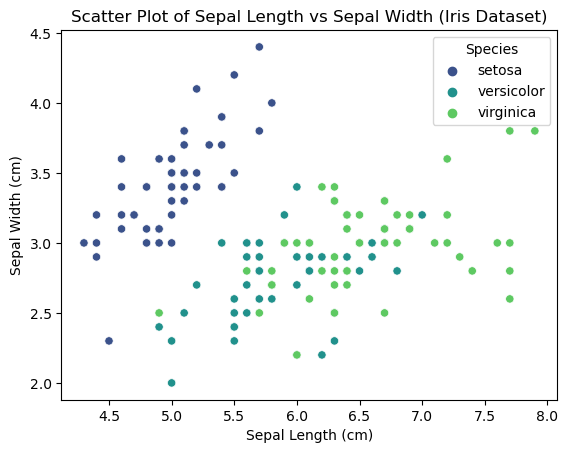

In [16]:
# Scatter plot using seaborn
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species_name', data=iris_df, palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width (Iris Dataset)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()